# Binary Tree

## Invert a binary tree

Neste desafio você deverá construir uma função que recebe uma árvore binária e inverta seus itens filhos, ou seja, o nó filho da direita do item atual deve ser invertido com o nó filho da esquerda.

Os nós podem ter valores ou até mesmo serem nulos (indicando que não possuem filhos).

Exemplos
Sua função receberá uma árvore binária da seguinte forma:

Exemplo 1

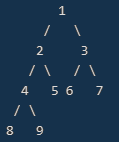

E deverá retornar a árvore binária da seguinte forma:

Exemplo 2

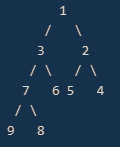


In [ ]:
class Node:
  def __init__(self, value=0, left=None, right=None):
      self.value = value
      self.left = left
      self.right = right


def solution(root):
    print(root.value)
    if root.left is None and root.right is None:
        return root
    root.left, root.right = root.right, root.left
    if root.left:
        solution(root.left)
    if root.right:
        solution(root.right)
    #return root

In [ ]:
node9 = Node(9)
node8 = Node(8)
node7 = Node(7)
node6 = Node(6)
node5 = Node(5)
node4 = Node(4, node8, node9)
node3 = Node(3, node6, node7)
node2 = Node(2, node4, node5)
node1 = Node(1, node2, node3)
solution(node1)

1
3
7
6
2
5
4
9
8


## Minimum Depth of Binary Tree

Dada uma árvore binária, encontre a menor profundidade da mesma.

A profundidade mínima é o número de nós que formam o menor caminho entre a raiz e o nó sem nenhum filho da árvore.

Nota: Um nó considerado sem nenhum filho é aquele em que o left e o right são nulos, ou seja, não tem nenhum filho.

Exemplo:
Dada a árvore binária [3, 9, 20, None, None, 15, 7],

```
  3
 / \
9  20
  /  \
 15   7
```
O resultado é 2 pois o menor caminho passa pelos números 3 e 9.

In [ ]:
def solution(root):
    if not root:
        return 0
    queue = [(root, 1)]
    while queue:
        node, level = queue.pop(0)
        if not node.left and not node.right:
            return level

        level += 1
        if node.left:
            queue.append((node.left, level))

        if node.right:
            queue.append((node.right, level))

    return 0


## Superbalanced Binary Tree

Write a function to see if a binary tree is "superbalanced" (a new tree property we just made up).

A tree is "superbalanced" if the difference between the depths of any two leaf nodes is no greater than one.



In [ ]:
def is_balanced(tree_root):

    # Determine if the tree is superbalanced
    if not tree_root:
        raise ValueError('There is no tree.')
    
    depths = []
    queue = [(tree_root, 1)]
    
    while queue:
        node, depth = queue.pop(0)
        
        if (not node.right) and (not node.left):
            if depth not in depths:
                depths.append(depth)
                # check if is not superbalanced
                if ((len(depths) > 2) or
                        (len(depths) == 2 and
                            abs(depths[0] - depths[1]) > 1)):
                    return False
                continue
        
        depth += 1
        if node.left:
            queue.append((node.left, depth))
            
        if node.right:
            queue.append((node.right, depth))

    return True


In [ ]:
import unittest

class Test(unittest.TestCase):

    class BinaryTreeNode(object):

        def __init__(self, value):
            self.value = value
            self.left = None
            self.right = None

        def insert_left(self, value):
            self.left = Test.BinaryTreeNode(value)
            return self.left

        def insert_right(self, value):
            self.right = Test.BinaryTreeNode(value)
            return self.right

    def test_full_tree(self):
        tree = Test.BinaryTreeNode(5)
        left = tree.insert_left(8)
        right = tree.insert_right(6)
        left.insert_left(1)
        left.insert_right(2)
        right.insert_left(3)
        right.insert_right(4)
        result = is_balanced(tree)
        self.assertTrue(result)

    def test_both_leaves_at_the_same_depth(self):
        tree = Test.BinaryTreeNode(3)
        left = tree.insert_left(4)
        right = tree.insert_right(2)
        left.insert_left(1)
        right.insert_right(9)
        result = is_balanced(tree)
        self.assertTrue(result)

    def test_leaf_heights_differ_by_one(self):
        tree = Test.BinaryTreeNode(6)
        left = tree.insert_left(1)
        right = tree.insert_right(0)
        right.insert_right(7)
        result = is_balanced(tree)
        self.assertTrue(result)

    def test_leaf_heights_differ_by_two(self):
        tree = Test.BinaryTreeNode(6)
        left = tree.insert_left(1)
        right = tree.insert_right(0)
        right_right = right.insert_right(7)
        right_right.insert_right(8)
        result = is_balanced(tree)
        self.assertFalse(result)

    def test_three_leaves_total(self):
        tree = Test.BinaryTreeNode(1)
        left = tree.insert_left(5)
        right = tree.insert_right(9)
        right.insert_left(8)
        right.insert_right(5)
        result = is_balanced(tree)
        self.assertTrue(result)

    def test_both_subtrees_superbalanced(self):
        tree = Test.BinaryTreeNode(1)
        left = tree.insert_left(5)
        right = tree.insert_right(9)
        right_left = right.insert_left(8)
        right.insert_right(5)
        right_left.insert_left(7)
        result = is_balanced(tree)
        self.assertFalse(result)

    def test_both_subtrees_superbalanced_two(self):
        tree = Test.BinaryTreeNode(1)
        left = tree.insert_left(2)
        right = tree.insert_right(4)
        left.insert_left(3)
        left_right = left.insert_right(7)
        left_right.insert_right(8)
        right_right = right.insert_right(5)
        right_right_right = right_right.insert_right(6)
        right_right_right.insert_right(9)
        result = is_balanced(tree)
        self.assertFalse(result)

    def test_three_leaves_at_different_levels(self):
        tree = Test.BinaryTreeNode(1)
        left = tree.insert_left(2)
        left_left = left.insert_left(3)
        left.insert_right(4)
        left_left.insert_left(5)
        left_left.insert_right(6)
        right = tree.insert_right(7)
        right_right = right.insert_right(8)
        right_right_right = right_right.insert_right(9)
        right_right_right.insert_right(10)
        result = is_balanced(tree)
        self.assertFalse(result)

    def test_only_one_node(self):
        tree = Test.BinaryTreeNode(1)
        result = is_balanced(tree)
        self.assertTrue(result)

    def test_linked_list_tree(self):
        tree = Test.BinaryTreeNode(1)
        right = tree.insert_right(2)
        right_right = right.insert_right(3)
        right_right.insert_right(4)
        result = is_balanced(tree)
        self.assertTrue(result)


unittest.main(argv=[''], verbosity=2, exit=False)
print()

test_both_leaves_at_the_same_depth (__main__.Test) ... ok
test_both_subtrees_superbalanced (__main__.Test) ... ok
test_both_subtrees_superbalanced_two (__main__.Test) ... ok
test_full_tree (__main__.Test) ... ok
test_leaf_heights_differ_by_one (__main__.Test) ... ok
test_leaf_heights_differ_by_two (__main__.Test) ... ok
test_linked_list_tree (__main__.Test) ... ok
test_only_one_node (__main__.Test) ... ok
test_three_leaves_at_different_levels (__main__.Test) ... ok
test_three_leaves_total (__main__.Test) ... 

ok

----------------------------------------------------------------------
Ran 10 tests in 0.022s

OK


## Valid Binary Search Tree

Write a function to check that a binary tree is a valid binary search tree.

In [ ]:
def is_binary_search_tree(root):

    # Start at the root, with an arbitrarily low lower bound
    # and an arbitrarily high upper bound
    node_and_bounds_stack = [(root, -float('inf'), float('inf'))]

    # Depth-first traversal
    while len(node_and_bounds_stack):
        node, lower_bound, upper_bound = node_and_bounds_stack.pop()

        # If this node is invalid, we return false right away
        if (node.value <= lower_bound) or (node.value >= upper_bound):
            return False

        if node.left:
            # This node must be less than the current node
            node_and_bounds_stack.append((node.left, lower_bound, node.value))
        if node.right:
            # This node must be greater than the current node
            node_and_bounds_stack.append((node.right, node.value, upper_bound))

    # If none of the nodes were invalid, return true
    # (at this point we have checked all nodes)
    return True

In [ ]:
import unittest


class Test(unittest.TestCase):

    class BinaryTreeNode(object):

        def __init__(self, value):
            self.value = value
            self.left = None
            self.right = None

        def insert_left(self, value):
            self.left = Test.BinaryTreeNode(value)
            return self.left

        def insert_right(self, value):
            self.right = Test.BinaryTreeNode(value)
            return self.right

    def test_valid_full_tree(self):
        tree = Test.BinaryTreeNode(50)
        left = tree.insert_left(30)
        right = tree.insert_right(70)
        left.insert_left(10)
        left.insert_right(40)
        right.insert_left(60)
        right.insert_right(80)
        result = is_binary_search_tree(tree)
        self.assertTrue(result)

    def test_both_subtrees_valid(self):
        tree = Test.BinaryTreeNode(50)
        left = tree.insert_left(30)
        right = tree.insert_right(80)
        left.insert_left(20)
        left.insert_right(60)
        right.insert_left(70)
        right.insert_right(90)
        result = is_binary_search_tree(tree)
        self.assertFalse(result)

    def test_descending_linked_list(self):
        tree = Test.BinaryTreeNode(50)
        left = tree.insert_left(40)
        left_left = left.insert_left(30)
        left_left_left = left_left.insert_left(20)
        left_left_left.insert_left(10)
        result = is_binary_search_tree(tree)
        self.assertTrue(result)

    def test_out_of_order_linked_list(self):
        tree = Test.BinaryTreeNode(50)
        right = tree.insert_right(70)
        right_right = right.insert_right(60)
        right_right.insert_right(80)
        result = is_binary_search_tree(tree)
        self.assertFalse(result)

    def test_one_node_tree(self):
        tree = Test.BinaryTreeNode(50)
        result = is_binary_search_tree(tree)
        self.assertTrue(result)


unittest.main(argv=[''], verbosity=2, exit=False)
print()

test_both_subtrees_valid (__main__.Test) ... ok
test_descending_linked_list (__main__.Test) ... ok
test_one_node_tree (__main__.Test) ... ok
test_out_of_order_linked_list (__main__.Test) ... ok
test_valid_full_tree (__main__.Test) ... 

ok

----------------------------------------------------------------------
Ran 5 tests in 0.012s

OK


## 2nd Largest Item in BST

Write a function to find the 2nd largest element in a binary search tree.

In [ ]:
def find_largest(root_node):
    current = root_node
    
    while current:
        if not current.right:
            return current.value
        
        current = current.right


def find_second_largest(root_node):

    # Find the second largest item in the binary search tree
    if (root_node is None or 
            (root_node.left is None and root_node.right is None)):
        raise ValueError('Tree must have at least 2 nodes')
        
    
    current = root_node
    
    while current:
        if current.left and not current.right:
            return find_largest(current.left)
        
        if (current.right and
                not current.right.left and
                not current.right.right):
            return current.value
            
        current = current.right

# Binary Search

## Find Rotation Point

### I want to learn some big words so people think I'm smart.

I opened up a dictionary to a page in the middle and started flipping through, looking for words I didn't know. I put each word I didn't know at increasing indices in a huge list I created in memory. When I reached the end of the dictionary, I started from the beginning and did the same thing until I reached the page I started at.

Now I have a list of words that are mostly alphabetical, except they start somewhere in the middle of the alphabet, reach the end, and then start from the beginning of the alphabet. In other words, this is an alphabetically ordered list that has been "rotated." 


For example: 

```
words = [
    'ptolemaic',
    'retrograde',
    'supplant',
    'undulate',
    'xenoepist',
    'asymptote',  # <-- rotates here!
    'babka',
    'banoffee',
    'engender',
    'karpatka',
    'othellolagkage',
]
```

**Write a function for finding the index of the "rotation point,"** which is where I started working from the beginning of the dictionary. This list is huge (there are lots of words I don't know) so we want to be efficient here. 

In [ ]:
def find_rotation_point(words):

    # Find the rotation point in the list
    floor_point = 0
    ceiling_point = len(words) - 1
    first_word = words[0]
    
    while floor_point  < ceiling_point:
        guess_point = floor_point + ((ceiling_point - floor_point) // 2)
        
        
        if words[guess_point] >= first_word:
            floor_point = guess_point
        else:
            ceiling_point = guess_point
            
        if floor_point + 1 == ceiling_point:
            return ceiling_point


## Find Repeat, Space Edition

 We have a list of integers, where:

    1. The integers are in the range 1..n1..n1..n
    2. The list has a length of n+1n+1n+1

It follows that our list has at least one integer which appears at least twice. But it may have several duplicates, and each duplicate may appear more than twice.

**Write a function which finds an integer that appears more than once in our list. Don't modify the input!** (If there are multiple duplicates, you only need to find one of them.)

We're going to run this function on our new, super-hip MacBook Pro With Retina Display™. Thing is, the damn thing came with the RAM soldered right to the motherboard, so we can't upgrade our RAM. **So we need to optimize for space!**

In [ ]:
def find_repeat(numbers):

    # Find a number that appears more than once
    floor = 1
    ceiling = len(numbers) - 1
    
    while floor < ceiling:
        
        midpoint = floor + ((ceiling - floor) // 2)
        lower_range_floor, lower_range_ceiling = floor, midpoint
        upper_range_floor, upper_range_ceiling = midpoint+1, ceiling
        
        items_in_lower_range = 0
        for item in numbers:
            
            if item >= lower_range_floor and item <= lower_range_ceiling:
                items_in_lower_range += 1
                
        distinct_possible_integers_in_lower_range = (
            lower_range_ceiling
            - lower_range_floor
            + 1
        )
        
        if items_in_lower_range > distinct_possible_integers_in_lower_range:
            floor, ceiling = lower_range_floor, lower_range_ceiling
            
        else:
            floor, ceiling = upper_range_floor, upper_range_ceiling


    return floor

## Top Scores

 You created a game that is more popular than Angry Birds.

Each round, players receive a score between 0 and 100, which you use to rank them from highest to lowest. So far you're using an algorithm that sorts in O(n lg ⁡n) O(n lg {n}) O(n lg n) time, but players are complaining that their rankings aren't updated fast enough. You need a faster sorting algorithm.

Write a function that takes:

    1. a list of unsorted_scores
    2. the highest_possible_score in the game

and returns a sorted list of scores in less than O(n lg⁡ n)O(n lg {n}) O(n lg n) time.

For example: 

    unsorted_scores = [37, 89, 41, 65, 91, 53]
    HIGHEST_POSSIBLE_SCORE = 100

    # Returns [91, 89, 65, 53, 41, 37]
    sort_scores(unsorted_scores, HIGHEST_POSSIBLE_SCORE)


 We’re defining nnn as the number of unsorted_scores because we’re expecting the number of players to keep climbing.

And, we'll treat highest_possible_score as a constant instead of factoring it into our big O time and space costs because the highest possible score isn’t going to change. Even if we do redesign the game a little, the scores will stay around the same order of magnitude. 

In [ ]:
def sort_scores(unsorted_scores, highest_possible_score):

    # Sort the scores in O(n) time
    score_counts = [0] * (highest_possible_score+1)
    
    for score in unsorted_scores:
        score_counts[score] += 1
        
    
    sorted_scores = []
    
    for score in range(len(score_counts) - 1, -1, -1):
        count = score_counts[score]
        
        for time in range(count):
            sorted_scores.append(score)

    return sorted_scores

## Merging Meeting Times

### Your company built an in-house calendar tool called HiCal. You want to add a feature to see the times in a day when everyone is available.

To do this, you’ll need to know when any team is having a meeting. In HiCal, a meeting is stored as a tuple ↴ of integers (start_time, end_time). These integers represent the number of 30-minute blocks past 9:00am.

For example:

    (2, 3)  # Meeting from 10:00 – 10:30 am
    (6, 9)  # Meeting from 12:00 – 1:30 pm

Write a function merge_ranges() that takes a list of multiple meeting time ranges and returns a list of condensed ranges.

For example, given:

    [(0, 1), (3, 5), (4, 8), (10, 12), (9, 10)]

your function would return:

    [(0, 1), (3, 8), (9, 12)]

Do not assume the meetings are in order. The meeting times are coming from multiple teams.

Write a solution that's efficient even when we can't put a nice upper bound on the numbers representing our time ranges. _Here we've simplified our times down to the number of 30-minute slots past 9:00 am. But we want the function to work even for very large numbers, like Unix timestamps. In any case, the spirit of the challenge is to merge meetings where start_time and end_time don't have an upper bound._ 

In [ ]:
def merge_ranges(meetings):

    # Merge meeting ranges
    if not meetings:
        return []
    sorted_meetings = sorted(meetings)
    merged_meetings = [sorted_meetings[0]]
    for current_meeting_start, current_meeting_end in sorted_meetings[1:]:
        last_merged_meeting_start, last_merged_meeting_end = merged_meetings[-1]
        
        if current_meeting_start <= last_merged_meeting_end:
            merged_meetings[-1] = (last_merged_meeting_start,
                                    max(last_merged_meeting_end,
                                        current_meeting_end))
        else:
            merged_meetings.append((current_meeting_start, current_meeting_end))
        
    return merged_meetings

# Depth First Search

## Longest Increasing Path in a Matrix

Dada uma matriz de inteiros, busque o tamanho do maior caminho em que os valores são incrementais.

Para cada célula, mova-se em quatro diferentes direções: esquerda, direita, para cima e para baixo. Você não poderá se mover diagonalmente ou para fora da matriz!

---

Exemplo 1:

Entrada: 
```
nums = [
    [9, 9, 4],
    [6, 6, 8],
    [2, 1, 1]
]
```
Saída: 4

Explicação: O maior caminho em que os valores são incrementais é `[1, 2, 6, 9]`

---

Exemplo 2:

Entrada:
``` 
nums = [
    [3, 4, 5],
    [3, 2, 6],
    [2, 2, 1]
]
```
Saída: 4

Explicação: O maior caminho em que os valores são incrementais é `[3, 4, 5, 6]`

In [ ]:
def solution(matrix):
    result = 0
    if not matrix or not matrix[0]:
        return result

    def is_valid_position(outer, inner, value):
        if (outer >= 0 and outer < vertical_size
                and inner >= 0 and inner < horizontal_size):
            return value < matrix[outer][inner]

    def depth_first_search(outer, inner):
        if count_matrix[outer][inner] != 0:
            return count_matrix[outer][inner]
        
        value = matrix[outer][inner]
        max_path = 0
        for next_outer, next_inner in [(outer + 1, inner), (outer - 1, inner),
                                       (outer, inner + 1), (outer, inner - 1)]:
            if is_valid_position(next_outer, next_inner, value):
                max_path = max(max_path, depth_first_search(next_outer, next_inner))
        count_matrix[outer][inner] = 1 + max_path

        return count_matrix[outer][inner]


    vertical_size, horizontal_size = len(matrix), len(matrix[0])
    count_matrix = [[0] * horizontal_size for _ in range(vertical_size)]

    for m in range(vertical_size):
        for n in range(horizontal_size):
            result = max(result, depth_first_search(m, n))
    return result


## 

# Graph

## Graph Coloring

Given an undirected graph with maximum degree DDD, find a graph coloring using at most D+1 colors.

In [ ]:
class GraphNode:

    def __init__(self, label):
        self.label = label
        self.neighbors = set()
        self.color = None


def color_graph(graph, colors):

    # Create a valid coloring for the graph
    for node in graph:
        if node in node.neighbors:
            raise Exception(f'Legal coloring impossible for node with loop: {node.label}')
        
        illegal_colors = set([
            neighbor.color
            for neighbor in node.neighbors
            if neighbor.color
        ])
        
        for color in colors:
            if color not in illegal_colors:
                node.color = color
                break

# Dynamic Programming

## Fibonacci

Write a function fib() that takes an integer n and returns the nth Fibonacci number.

Let's say our Fibonacci series is 0-indexed and starts with 0.

In [ ]:
def fib(n):

    # Compute the nth Fibonacci number
    if n < 0:
        raise ValueError('Index was negative.')
        
    elif n in [1, 0]:
        return n
        
    
    prev_prev = 0
    prev = 1
    
    for _ in range(n-1):
        current = prev + prev_prev
        prev_prev = prev
        prev = current

    return current


In [ ]:
import unittest


class Test(unittest.TestCase):

    def test_zeroth_fibonacci(self):
        actual = fib(0)
        expected = 0
        self.assertEqual(actual, expected)

    def test_first_fibonacci(self):
        actual = fib(1)
        expected = 1
        self.assertEqual(actual, expected)

    def test_second_fibonacci(self):
        actual = fib(2)
        expected = 1
        self.assertEqual(actual, expected)

    def test_third_fibonacci(self):
        actual = fib(3)
        expected = 2
        self.assertEqual(actual, expected)

    def test_fifth_fibonacci(self):
        actual = fib(5)
        expected = 5
        self.assertEqual(actual, expected)

    def test_tenth_fibonacci(self):
        actual = fib(10)
        expected = 55
        self.assertEqual(actual, expected)

    def test_negative_fibonacci(self):
        with self.assertRaises(Exception):
            fib(-1)


unittest.main(argv=[''], verbosity=2, exit=False)
print()

test_fifth_fibonacci (__main__.Test) ... ok
test_first_fibonacci (__main__.Test) ... ok
test_negative_fibonacci (__main__.Test) ... ok
test_second_fibonacci (__main__.Test) ... ok
test_tenth_fibonacci (__main__.Test) ... ok
test_third_fibonacci (__main__.Test) ... ok
test_zeroth_fibonacci (__main__.Test) ... 

ok

----------------------------------------------------------------------
Ran 7 tests in 0.024s

OK
